<a href="https://colab.research.google.com/github/moshehaimlevi/examlib2-14-05/blob/main/examlib2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/order_item.csv'
order_item_df = pd.read_csv(file_path)

drive.mount('/content/drive')
file_path = '/content/drive/My Drive/customers.csv'
customers_df = pd.read_csv(file_path)

drive.mount('/content/drive')
file_path = '/content/drive/My Drive/orders.csv'
orders_df = pd.read_csv(file_path)

drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Items.csv'
items_df = pd.read_csv(file_path)

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


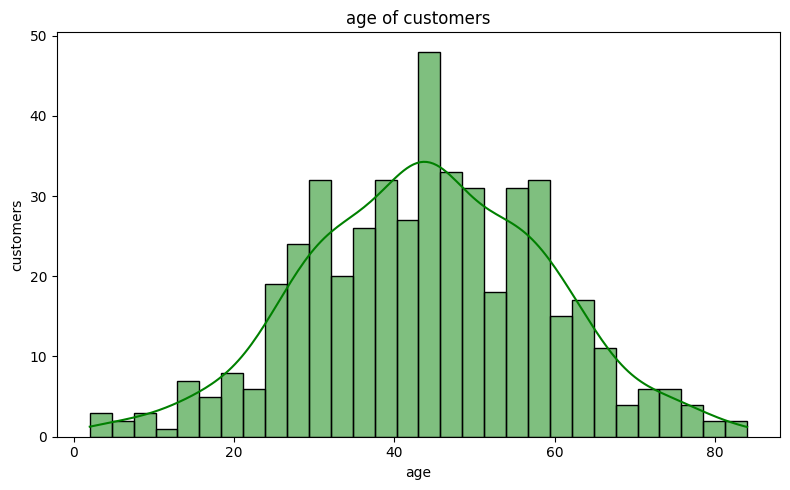

In [4]:
############################## QUESTION NUMBER 2 ##############################
############### GRAPH ###############
############### SECTION NUMBER 3 ###############
plt.figure(figsize=(8, 5))
sns.histplot(data=customers_df, x='age', bins=30, kde=True, color='green')
plt.title('age of customers')
plt.xlabel('age')
plt.ylabel('customers')
plt.tight_layout()
plt.show()

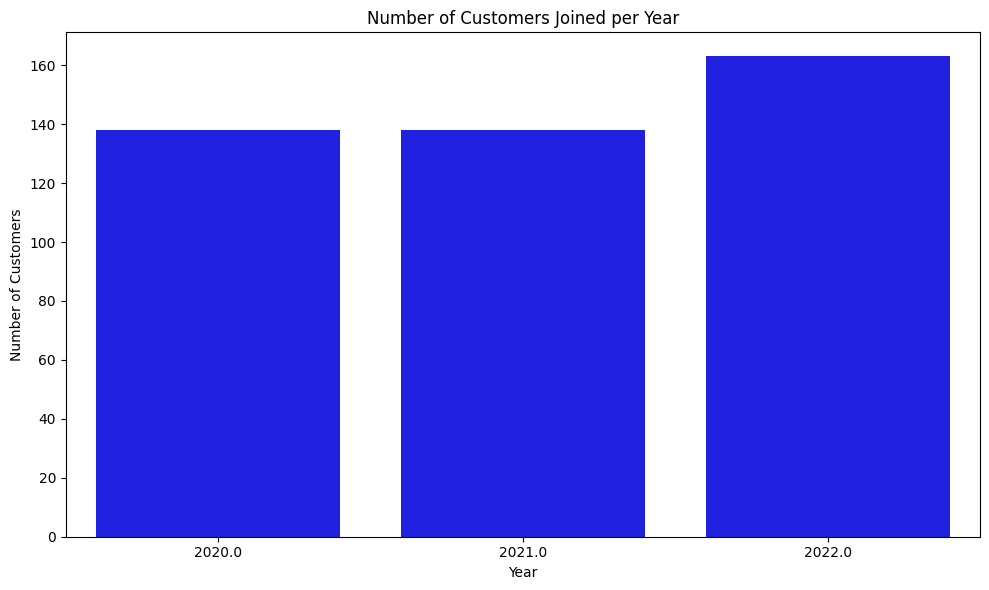

In [10]:
############### SECTION NUMBER 4 ###############
customers_df['joining_date'] = pd.to_datetime(customers_df['joining_date'], dayfirst=True)

customers_df['join_year'] = customers_df['joining_date'].dt.year

yearly_counts = customers_df['join_year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=yearly_counts.index, y=yearly_counts.values, color='blue')
plt.title('Number of Customers Joined per Year')
plt.xlabel('Year')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()


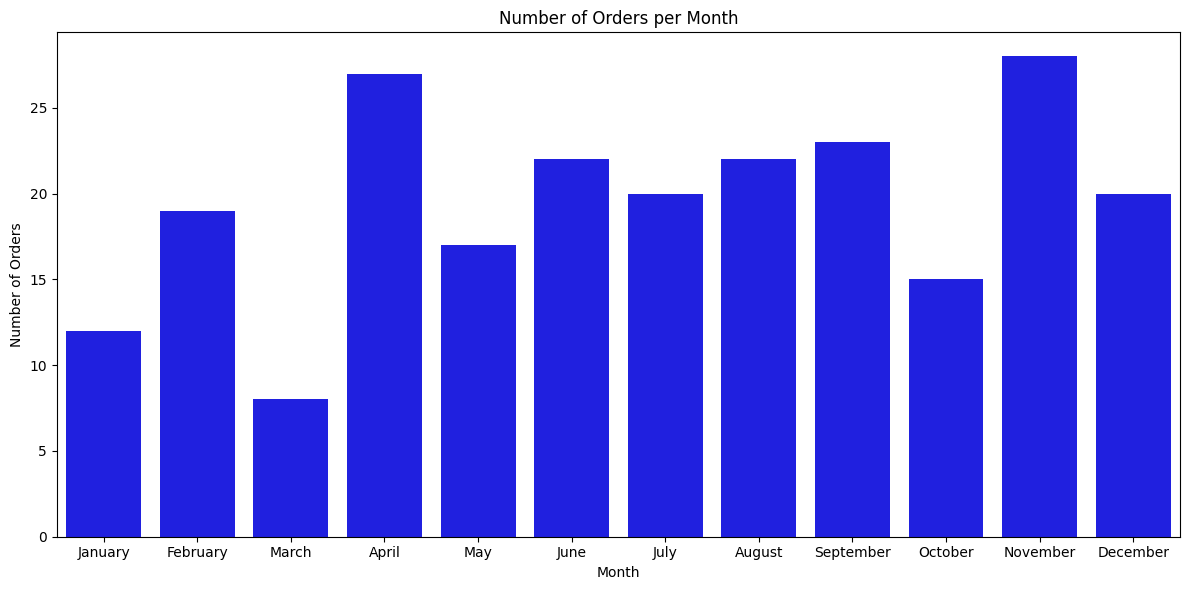

In [16]:
############### SECTION NUMBER 5 ###############
orders_df['order_date'] = pd.to_datetime(
    orders_df['order_date'],
    dayfirst=True,
    errors='coerce',
)

orders_df = orders_df.dropna(subset=['order_date'])

orders_df['order_month'] = orders_df['order_date'].dt.month_name()
monthly_counts = orders_df['order_month'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]).fillna(0)

plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, color='blue')
plt.title('Number of Orders per Month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()




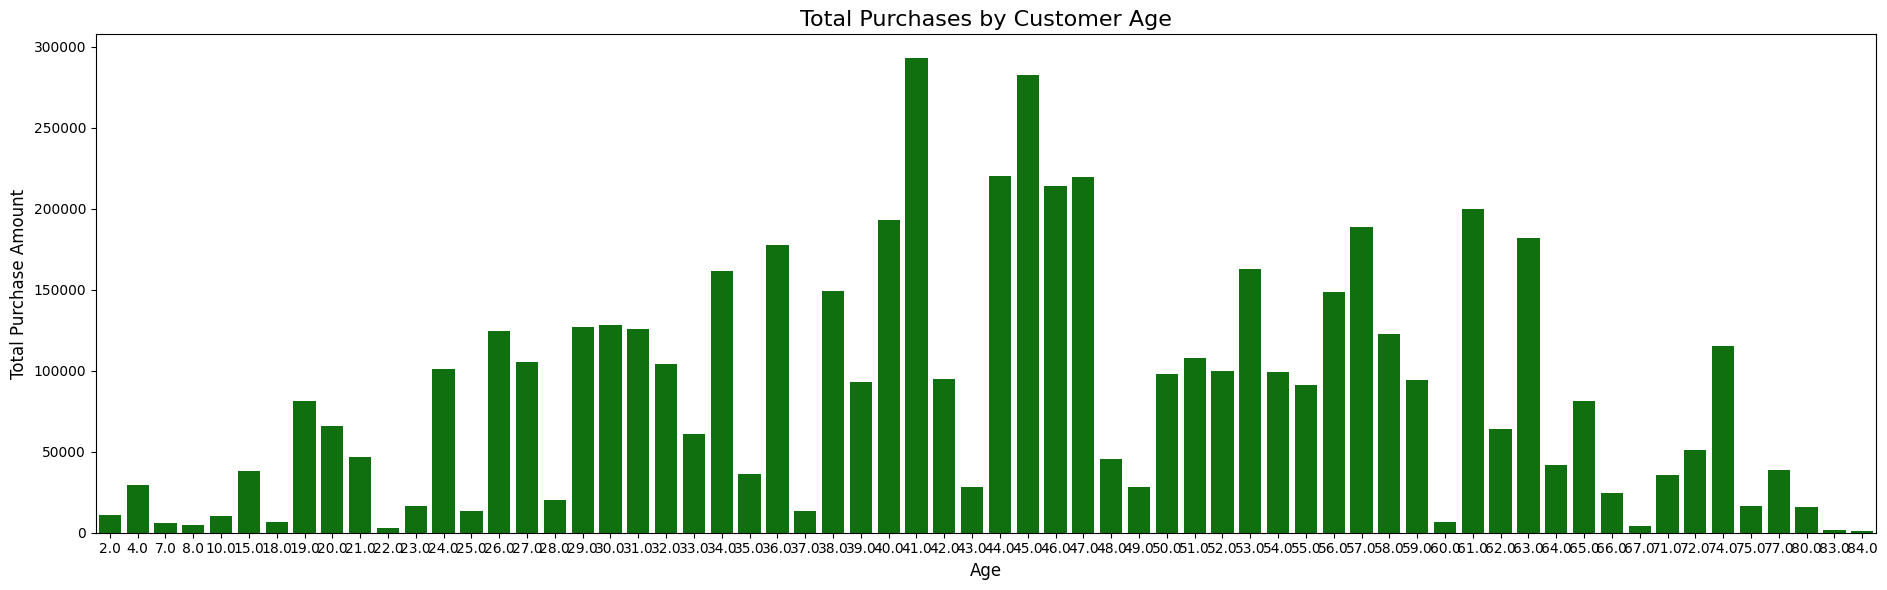

In [76]:
############### SECTION NUMBER 6 ###############

order_item_merged = order_item_df.merge(
    items_df[['id', 'item_price']],
    left_on='item_id',
    right_on='id',
    how='left'
)

order_item_merged['total_price'] = order_item_merged['item_price'] * order_item_merged['quantity']

orders_with_age = orders_df.merge(
    customers_df[['id', 'age']],
    left_on='customer_id',
    right_on='id',
    how='left'
)

order_item_merged_with_age = order_item_merged.merge(
    orders_with_age[['order_id', 'age']],
    on='order_id',
    how='left'
)


plt.figure(figsize=(19, 6))
sns.barplot(data=age_grouped, x='age', y='total_price', color='green')
plt.title('Total Purchases by Customer Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Total Purchase Amount', fontsize=12)
plt.tight_layout()
plt.show()

